# Stock Prediction

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf

In [7]:
stock_data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402178,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714722,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716957,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973557,237458000


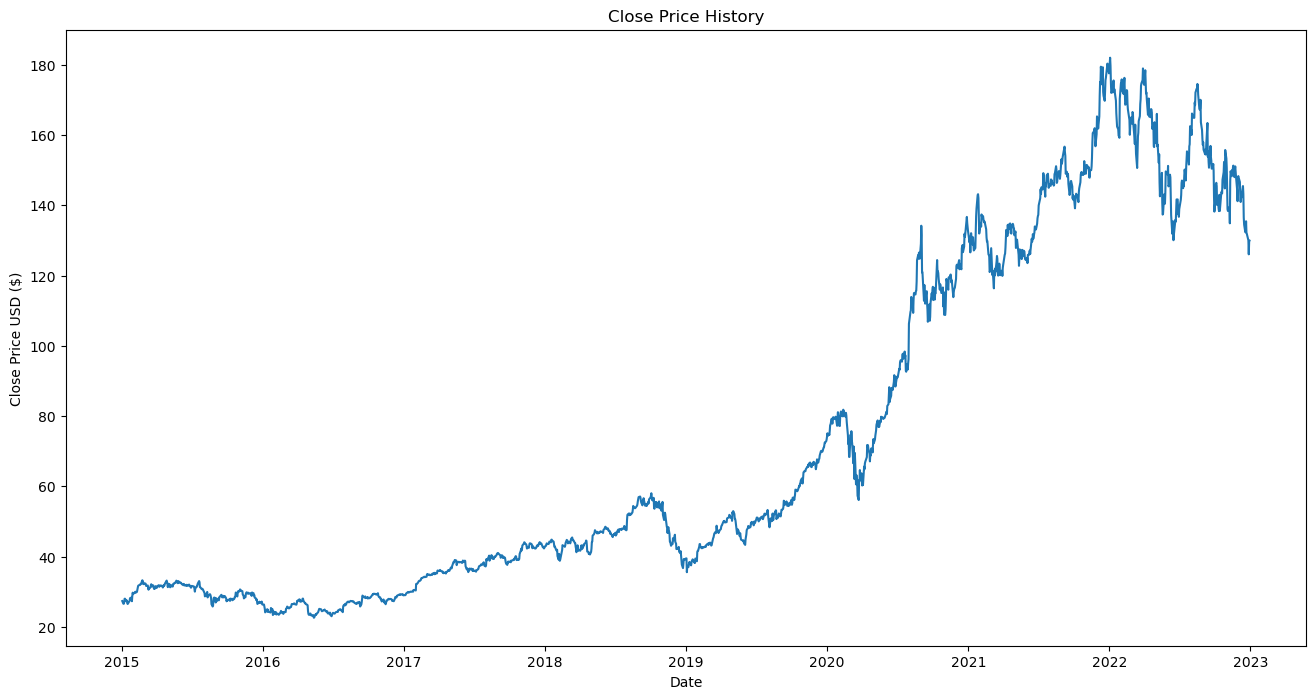

In [6]:
plt.figure(figsize=(16,8))
plt.plot(stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

In [9]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Create the dataset with 60 time steps and 1 output
time_step = 60
X, y = create_dataset(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

### Training

In [10]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### LSTM Model

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)

C:\Users\gh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.0215
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 8.8940e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 3.9181e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 3.5197e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 3.2430e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.5355e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 3.3538e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 3.4932e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.9082e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.9659e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 2.9632e-04
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 3.2406e-04
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 2.7817e-04
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 2.8579e-04
Epoch

### Make Predictions

In [12]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


### Visualize the Results

ValueError: could not broadcast input array from shape (391,1) into shape (332,1)

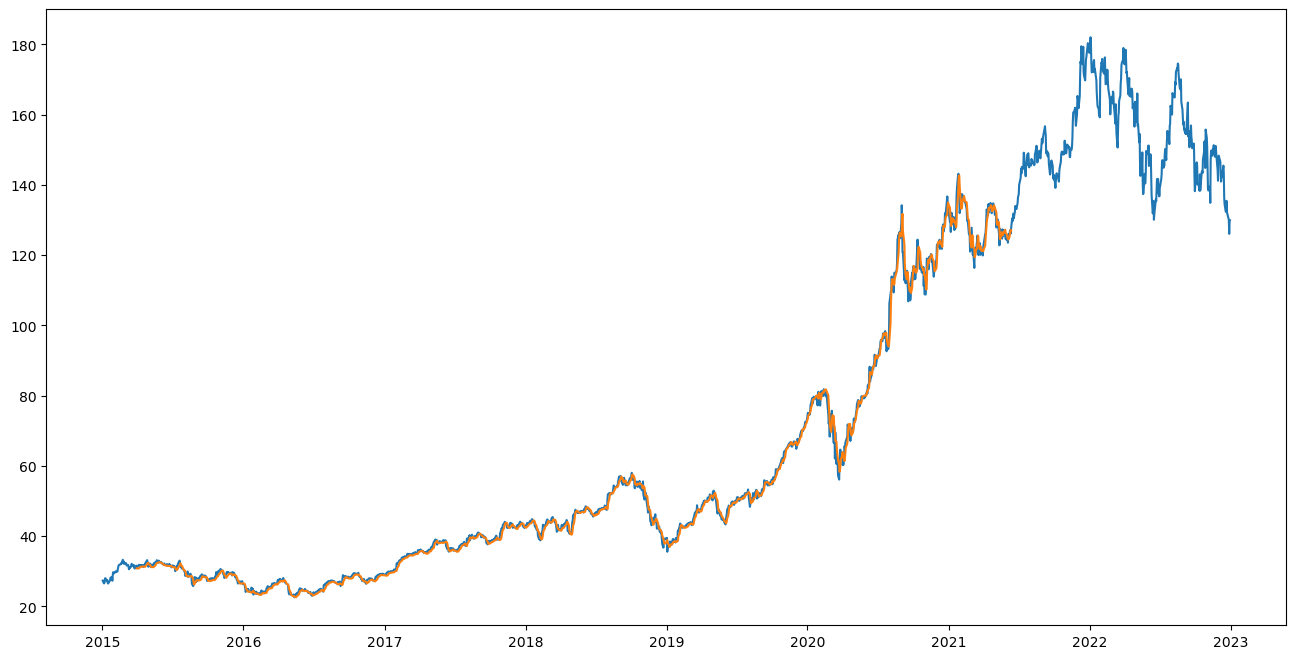

In [14]:
plt.figure(figsize=(16,8))
plt.plot(stock_data['Close'], label='Actual Stock Price')

# Plot the training predictions
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict)+time_step, :] = train_predict
plt.plot(stock_data.index, train_plot, label='Training Prediction')

# Plot the test predictions
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan

test_start_idx = len(train_predict) + (time_step * 2)
test_plot[test_start_idx:test_start_idx+len(test_predict), :] = test_predict
plt.plot(stock_data.index, test_plot, label='Test Prediction')

plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend()
plt.show()


In [15]:
last_time_step_data = scaled_data[-time_step:]

last_time_step_data = np.reshape(last_time_step_data, (1, time_step, 1))

next_day_prediction_scaled = model.predict(last_time_step_data)

next_day_prediction = scaler.inverse_transform(next_day_prediction_scaled)

print("Predicted Stock Price for the Next Day: $", next_day_prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Stock Price for the Next Day: $ 129.3763
